<a href="https://colab.research.google.com/github/Vignesh-kanna/ml_with_flask/blob/main/Day22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Civil_Engineering_Regression_Dataset.csv")

Saving Civil_Engineering_Regression_Dataset.csv to Civil_Engineering_Regression_Dataset.csv


In [6]:
X = df[['Building_Height']]
y = df['Construction_Cost']

In [7]:
lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression()

In [8]:
intercept = lr_model.intercept_
slope = lr_model.coef_[0]

print(f"\nRegression Equation: Construction Cost = {intercept:.2f} + ({slope:.2f} × Building Height)")


Regression Equation: Construction Cost = 994.03 + (50.21 × Building Height)


In [9]:
print(f"\nInterpretation: For every 1 unit increase in Building Height, Construction Cost increases by {slope:.2f}.")


Interpretation: For every 1 unit increase in Building Height, Construction Cost increases by 50.21.


In [10]:
y_pred = lr_model.predict(X)


In [11]:
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Squared Error (MSE): {mse:.2f}")


Model Performance:
R² Score: 0.9154
Mean Squared Error (MSE): 41323.45


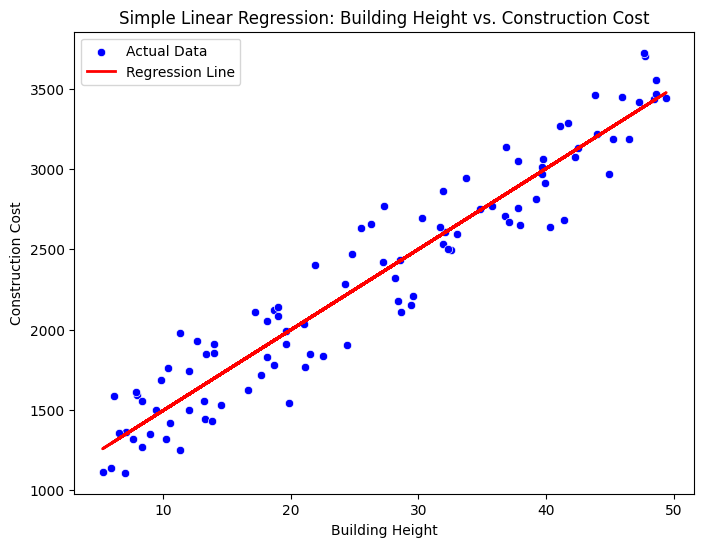

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Building_Height'], y=y, color="blue", label="Actual Data") # Changed 'Building Height' to 'Building_Height'
plt.plot(X['Building_Height'], y_pred, color='red', linewidth=2, label="Regression Line") # Changed X to X['Building_Height']
plt.xlabel("Building Height")
plt.ylabel("Construction Cost")
plt.title("Simple Linear Regression: Building Height vs. Construction Cost")
plt.legend()
plt.show()

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [16]:
[{"name":"df","value":"(100, 8) Project_ID  Building_…","type":"DataFrame"}]

[{'name': 'df',
  'value': '(100, 8) Project_ID  Building_…',
  'type': 'DataFrame'}]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [20]:
intercept = mlr_model.intercept_
coefficients = mlr_model.coef_

print("\nRegression Equation:")
print(f"Construction Cost = {intercept:.2f} + ({coefficients[0]:.2f} × Building Height)") # Only include the coefficient for Building Height


Regression Equation:
Construction Cost = 992.19 + (49.67 × Building Height)


In [21]:
for feature, coef in zip(X.columns, coefficients):
    print(f"\nInterpretation: For every 1 unit increase in {feature}, Construction Cost increases by {coef:.2f} units.")



Interpretation: For every 1 unit increase in Building_Height, Construction Cost increases by 49.67 units.


In [22]:
y_pred = mlr_model.predict(X_test)

In [23]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")  # Closer to 1 is better
print(f"Mean Squared Error (MSE): {mse:.2f}")


Model Performance:
R² Score: 0.9251
Mean Squared Error (MSE): 42990.65


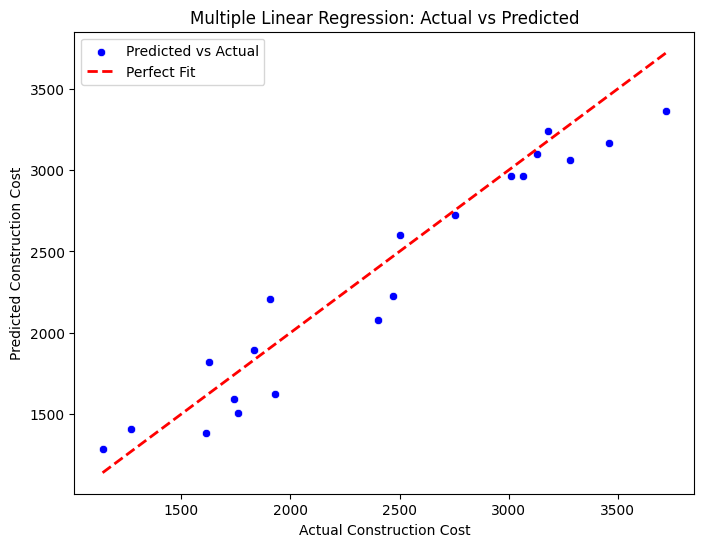

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Construction Cost")
plt.ylabel("Predicted Construction Cost")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [25]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming X is your DataFrame with features
X = add_constant(X)  # Adding a constant column

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

           Feature      VIF
0            const  4.85665
1  Building_Height  1.00000


In [31]:
print("\nVariance Inflation Factor (VIF) Scores:")
print(vif_data)


Variance Inflation Factor (VIF) Scores:
           Feature      VIF
0            const  4.85665
1  Building_Height  1.00000


In [32]:
high_vif_features = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()
if high_vif_features:
    print(f"\nHighly correlated features (VIF > 5): {high_vif_features}")
    X = X.drop(columns=high_vif_features)  # Remove high VIF features
else:
    print("\nNo multicollinearity issues detected!")


No multicollinearity issues detected!


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = mlr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nUpdated Model Performance After Removing Multicollinearity:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Updated Model Performance After Removing Multicollinearity:
R² Score: 0.9251
Mean Squared Error (MSE): 42990.65
